##### 1.使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
##### 2.使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。
##### 3.对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
##### 4.对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
##### 5.使用Matplotlib绘制图表
###### 绘制条形图：展示label列的类别分布。
###### 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
###### 绘制直方图：展示log_public_repos的对数变换后的数据分布。
###### 绘制散点图：展示public_repos与followers之间的关系。
###### 绘制散点矩阵：展示多个数值型特征之间的成对关系。
##### 6.使用Seaborn绘制图表
###### 绘制箱线图：展示不同label类别下log_followers的分布。
###### 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
###### 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
###### 绘制小提琴图：展示label与log_followers之间的分布差异。
##### 7.使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [1]:
import pandas as pd
data = pd.read_csv('data/github_bot_raw_data.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:

print(data.head())
print(data.info())
print(data.describe())

   actor_id  label      login        id               node_id  \
0   1081405  Human    dlazesz   1081405  MDQ6VXNlcjEwODE0MDU=   
1  13100598  Human  sarkiroka  13100598  MDQ6VXNlcjEzMTAwNTk4   
2     22494  Human  ZoomQuiet     22494      MDQ6VXNlcjIyNDk0   
3   7648032    Bot   AlCutter   7648032  MDQ6VXNlcjc2NDgwMzI=   
4   2163522  Human    meetyan   2163522  MDQ6VXNlcjIxNjM1MjI=   

                                          avatar_url  gravatar_id  \
0  https://avatars.githubusercontent.com/u/108140...          NaN   
1  https://avatars.githubusercontent.com/u/131005...          NaN   
2  https://avatars.githubusercontent.com/u/22494?v=4          NaN   
3  https://avatars.githubusercontent.com/u/764803...          NaN   
4  https://avatars.githubusercontent.com/u/216352...          NaN   

                                      url                      html_url  \
0    https://api.github.com/users/dlazesz    https://github.com/dlazesz   
1  https://api.github.com/users/sarkiroka  h

In [3]:
data['created_at'] = pd.to_datetime(data['created_at']) 
data['followers_percentage'] = (data['followers'] / data['following']).fillna(0).round(2)
data['followers_percentage'] = data['followers_percentage'].apply(lambda x: f"{x:.2%}")
print(data.head())

   actor_id  label      login        id               node_id  \
0   1081405  Human    dlazesz   1081405  MDQ6VXNlcjEwODE0MDU=   
1  13100598  Human  sarkiroka  13100598  MDQ6VXNlcjEzMTAwNTk4   
2     22494  Human  ZoomQuiet     22494      MDQ6VXNlcjIyNDk0   
3   7648032    Bot   AlCutter   7648032  MDQ6VXNlcjc2NDgwMzI=   
4   2163522  Human    meetyan   2163522  MDQ6VXNlcjIxNjM1MjI=   

                                          avatar_url  gravatar_id  \
0  https://avatars.githubusercontent.com/u/108140...          NaN   
1  https://avatars.githubusercontent.com/u/131005...          NaN   
2  https://avatars.githubusercontent.com/u/22494?v=4          NaN   
3  https://avatars.githubusercontent.com/u/764803...          NaN   
4  https://avatars.githubusercontent.com/u/216352...          NaN   

                                      url                      html_url  \
0    https://api.github.com/users/dlazesz    https://github.com/dlazesz   
1  https://api.github.com/users/sarkiroka  h

In [4]:
import numpy as np

for col in ['public_repos', 'public_gists', 'followers', 'following']:
    data[f'log_{col}'] = np.log1p(data[col])  # log(1+x) 防止 log(0)
print(data[['log_public_repos', 'log_followers']].head())


   log_public_repos  log_followers
0          3.295837       1.791759
1          3.433987       2.302585
2          4.644391       7.100852
3          3.912023       4.442651
4          2.484907       1.945910


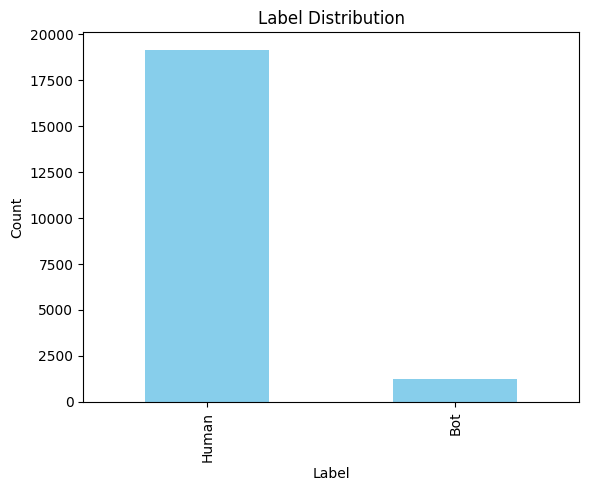

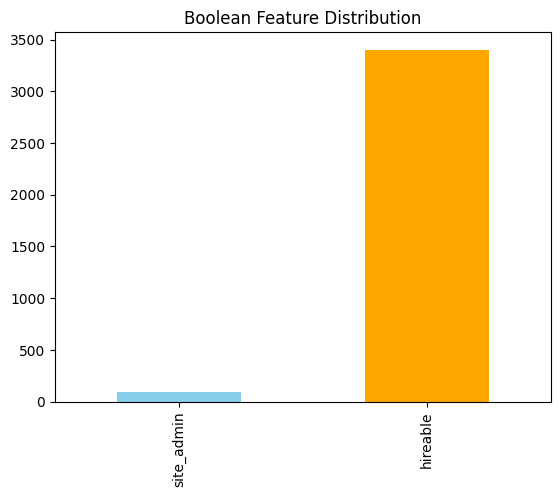

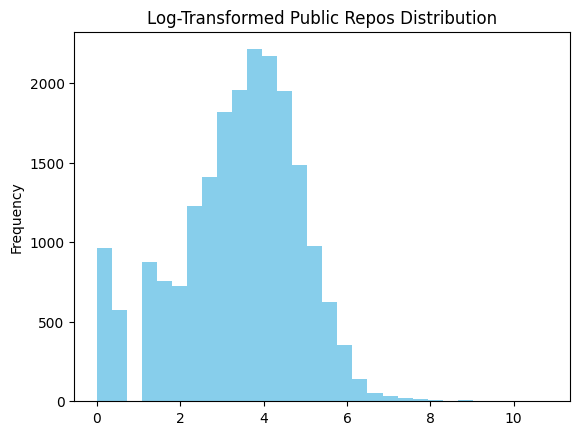

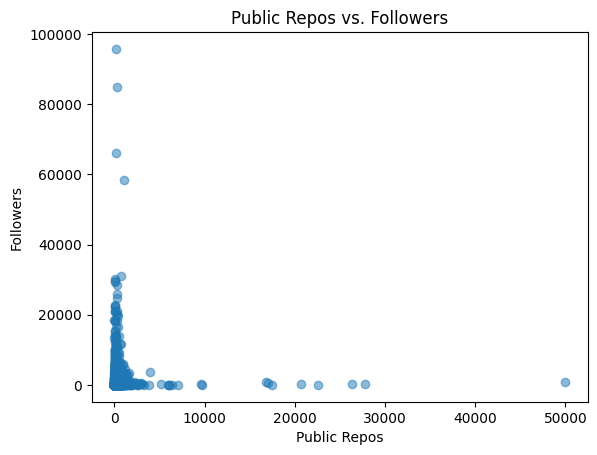

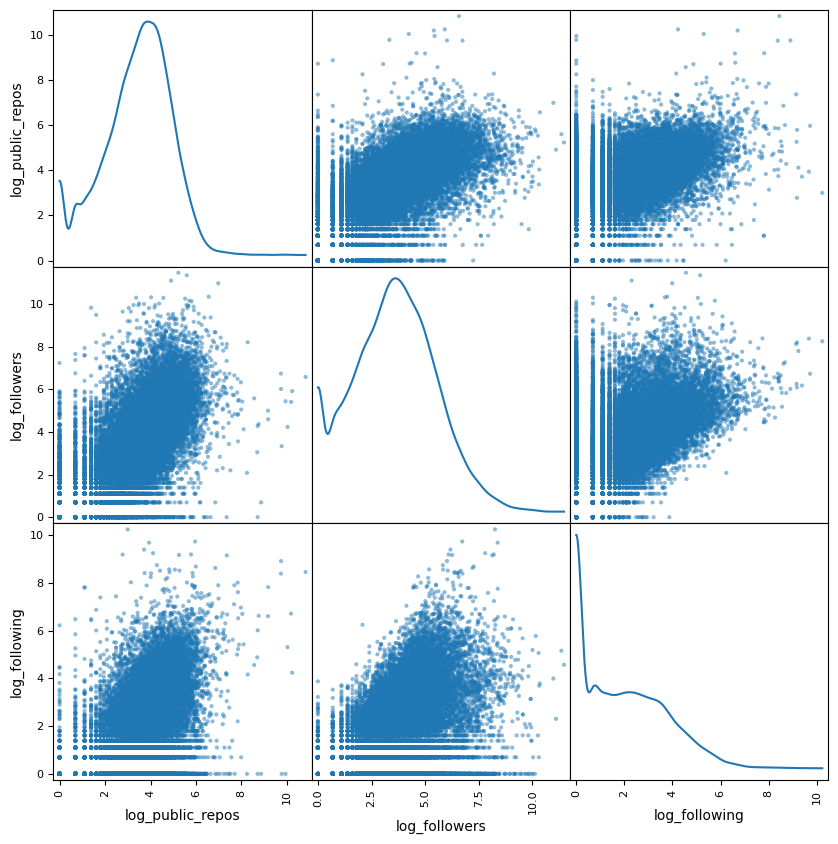

In [5]:
import matplotlib.pyplot as plt

label_counts = data['label'].value_counts()
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

bool_cols = ['site_admin', 'hireable'] 
data[bool_cols].sum().plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Boolean Feature Distribution')
plt.show()

data['log_public_repos'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Log-Transformed Public Repos Distribution')
plt.show()

plt.scatter(data['public_repos'], data['followers'], alpha=0.5)
plt.title('Public Repos vs. Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

from pandas.plotting import scatter_matrix

scatter_matrix(data[['log_public_repos', 'log_followers', 'log_following']], figsize=(10, 10), diagonal='kde')
plt.show()


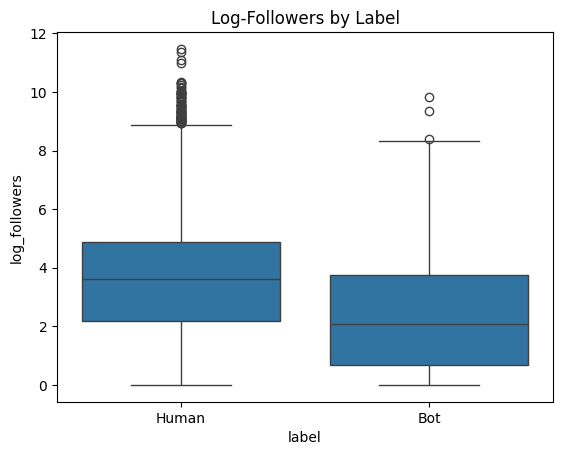

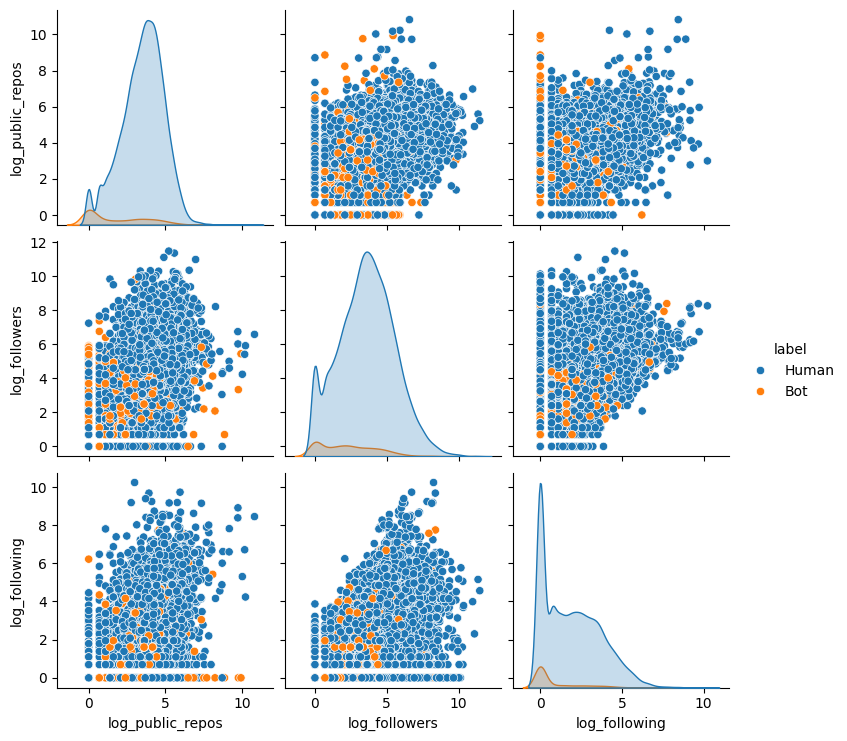

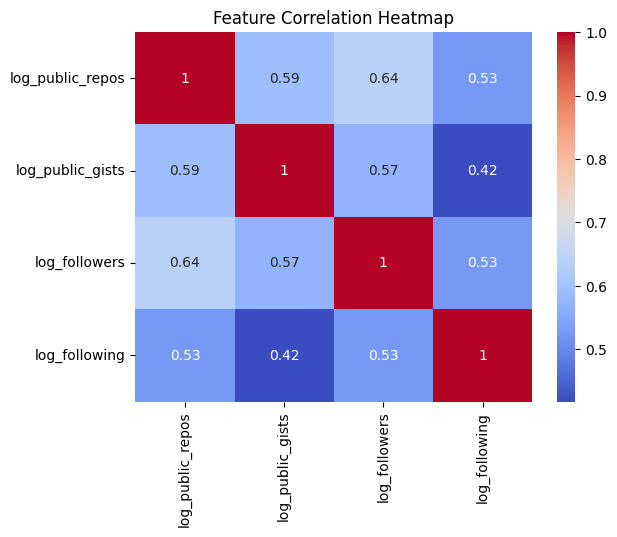

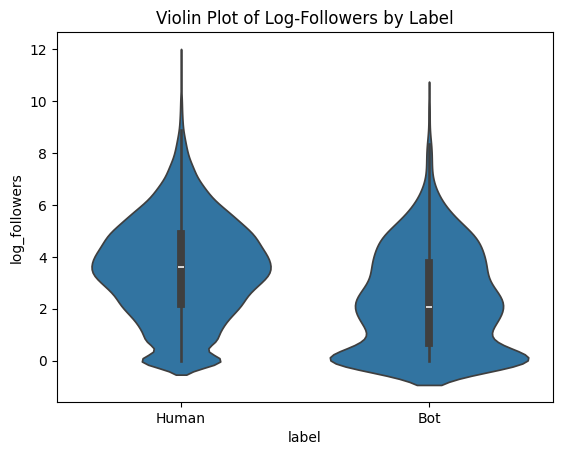

In [6]:
import seaborn as sns

sns.boxplot(x='label', y='log_followers', data=data)
plt.title('Log-Followers by Label')
plt.show()

sns.pairplot(data, vars=['log_public_repos', 'log_followers', 'log_following'], hue='label')
plt.show()

corr = data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

sns.violinplot(x='label', y='log_followers', data=data)
plt.title('Violin Plot of Log-Followers by Label')
plt.show()

In [7]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="GitHub Bot Data Report", explorative=True)
profile.to_file("github_bot_data_report.html")


d:\Python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 24.25it/s]
